In [4]:
#Import Modules

import pandas as pd
from mplsoccer import Pitch

In [11]:
# Read csv file

df = pd.read_csv('/Users/ismaelcisse/Downloads/valladolidA.csv')
df.head()

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY
0,2248226915,2,0,0.0,Barcelona,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
1,2248226919,2,0,0.0,Valladolid,0.0,0.0,1,Start,Successful,NaN,NaN,NaN
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8


In [12]:
# Create another dataframe that filter Barcenolas passes only 
df_b = df[df['teamId']=='Barcelona']

In [20]:
# Create 2 columns in the new dataframe to:
# - know player who made the pass
df_b['passer'] = df_b['playerId']
# - know the which player received the pass
df_b['recipent'] = df_b['playerId'].shift(-1)

# Filter succesful passes only
passes = df_b[df_b['type']== 'Pass']
successful = passes[passes['outcome']=='Successful']

/var/folders/fp/nkvz8km55ybd4yzr2wcb2pjr0000gn/T/ipykernel_98587/3987076634.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b['passer'] = df_b['playerId']
/var/folders/fp/nkvz8km55ybd4yzr2wcb2pjr0000gn/T/ipykernel_98587/3987076634.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b['recipent'] = df_b['playerId'].shift(-1)


In [73]:
successful.head()

,id,eventId,minute,second,teamId,x,y,period,type,outcome,playerId,endX,endY,passer,recipent
2,2248226929,3,0,1.0,Barcelona,50.0,50.0,1,Pass,Successful,9.0,43.9,46.9,9,8
3,2248226941,4,0,2.0,Barcelona,43.8,46.9,1,Pass,Successful,8.0,36.4,56.0,8,21
4,2248226951,5,0,4.0,Barcelona,36.6,56.6,1,Pass,Successful,21.0,28.5,73.8,21,15
5,2248226973,6,0,5.0,Barcelona,28.3,74.1,1,Pass,Successful,15.0,11.6,51.8,15,1
6,2248226975,7,0,8.0,Barcelona,11.2,53.7,1,Pass,Successful,1.0,11.6,81.4,1,15


In [29]:
# Filter all Pass Network before substitutions

# Filter inside 'type' column to fetch when substitions were made
subs = df_b[df_b['type']=='SubstitutionOff']

# Filter 'minute' column to get the exact minute of substitution
subs = subs['minute']

# Collect minute of first substitution from Barcelona
firstSub = subs.min()

In [32]:
# Filter all successful passes before first substitution
successful = successful[successful['minute']<firstSub]

In [35]:
# Modify 'passer' and 'recipent' data type : from float to integer
pas = pd.to_numeric(successful['passer'],downcast='integer')
rec = pd.to_numeric(successful['recipent'],downcast='integer')

successful['passer'] = pas
successful['recipent'] = rec

In [37]:
# Compute average locations  passes of each Barcelona players 
average_locations = successful.groupby('passer').agg({'x':['mean'],'y':['mean','count']})
average_locations.columns = ['x','y','columns']

In [74]:
average_locations

,x,y,columns
passer,,,
1,7.124000,50.324000,25
2,68.274359,11.915385,39
4,32.895833,43.518750,48
8,53.332927,41.608537,82
9,69.916667,51.383333,6
10,63.201613,42.351613,62
15,38.409091,74.378182,55
16,69.594286,69.471429,35
18,55.242553,83.793617,47


In [72]:
# Regroup passes by each player 
pass_between = successful.groupby(['passer','recipent']).id.count().reset_index()
pass_between.rename({'id':'pass_count'},axis='columns',inplace=True)

# Merge columns from average_location dataframe to pass_between dataframe
pass_between = pass_between.merge(average_locations, left_on='passer',right_index = True)
pass_between = pass_between.merge(average_locations, left_on='recipent',right_index = True,suffixes=['','_end'])

pass_between

,passer,recipent,pass_count,x,y,columns,x_end,y_end,columns_end
0,1,2,3,7.124000,50.324000,25,68.274359,11.915385,39
18,4,2,1,32.895833,43.518750,48,68.274359,11.915385,39
26,8,2,8,53.332927,41.608537,82,68.274359,11.915385,39
35,9,2,2,69.916667,51.383333,6,68.274359,11.915385,39
39,10,2,6,63.201613,42.351613,62,68.274359,11.915385,39
...,...,...,...,...,...,...,...,...,...
52,15,10,1,38.409091,74.378182,55,63.201613,42.351613,62
60,16,10,10,69.594286,69.471429,35,63.201613,42.351613,62
70,18,10,7,55.242553,83.793617,47,63.201613,42.351613,62
77,21,10,14,55.663636,52.263636,55,63.201613,42.351613,62


In [46]:
# (Filter pass count, display only passes greater than 3)
# Setting a threshold so that only pairs of players with at least 5 passes made between them are maintained
pass_between = pass_between[pass_between['pass_count']>3]

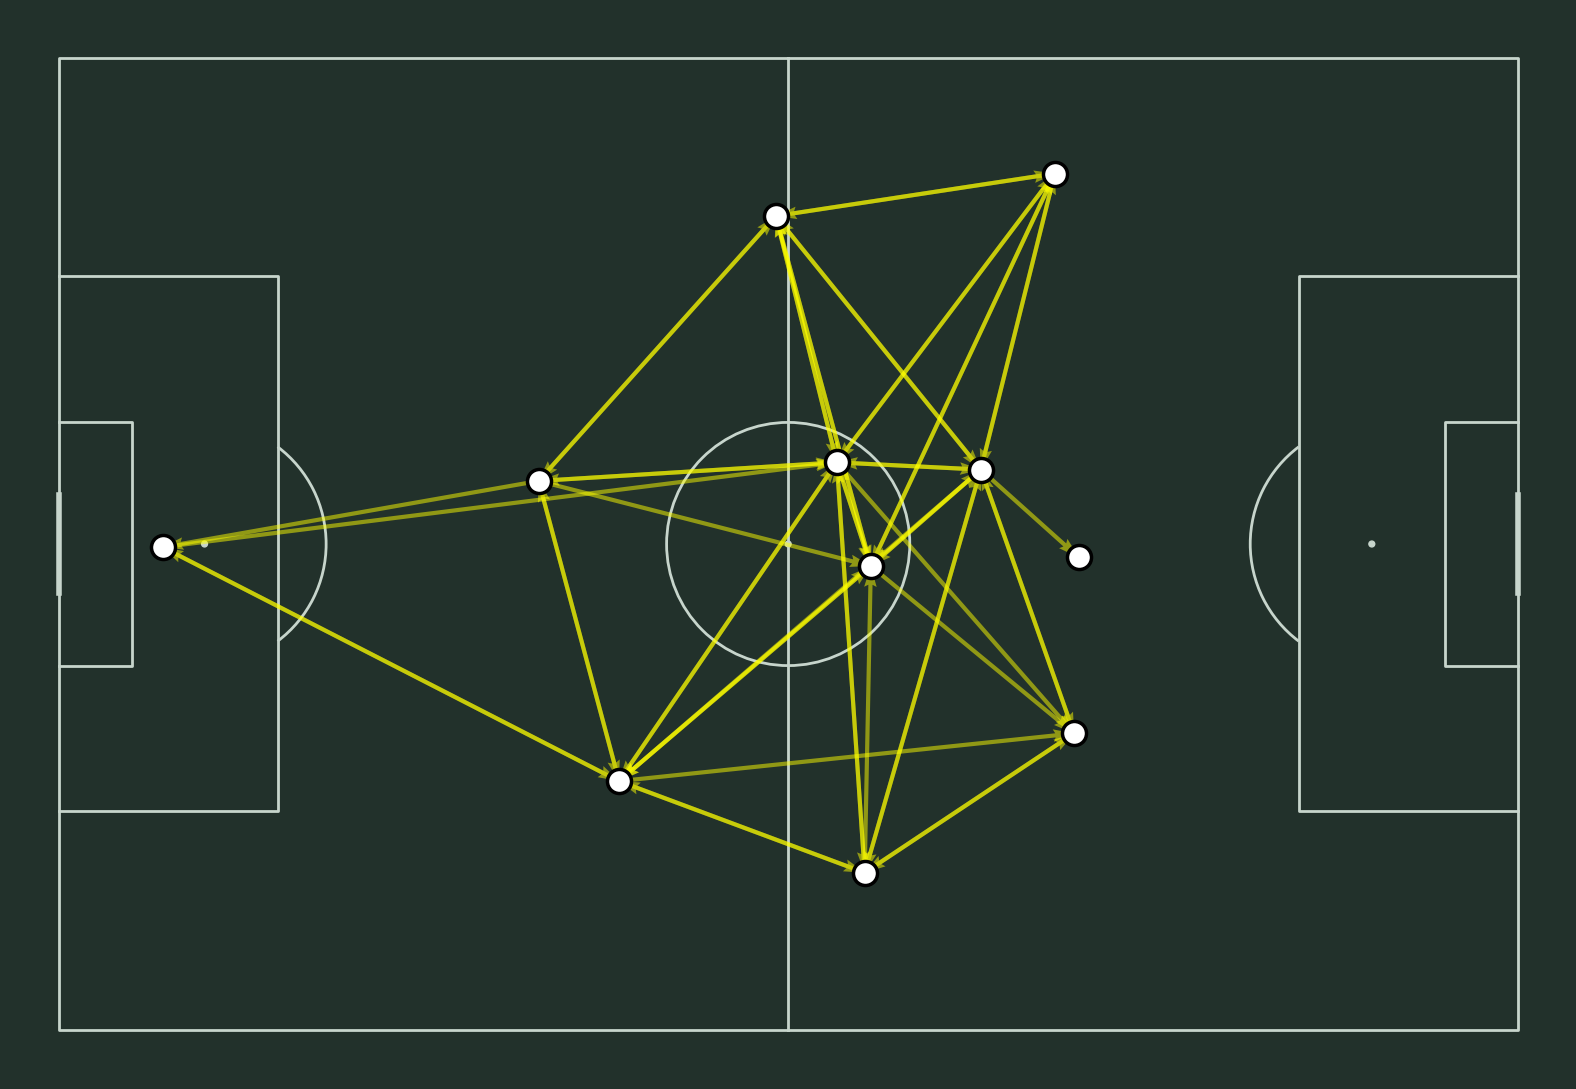

In [68]:
# Display the pitch with pass_count data
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')

arrows = pitch.arrows(1.2*pass_between.x,0.8*pass_between.y,1.2*pass_between.x_end,0.8*pass_between.y_end,ax=ax,
                     width= 3, headwidth= 3, color='yellow', zorder= 1, alpha= 0.5)

nodes = pitch.scatter(1.2*average_locations.x,0.8*average_locations.y, s=300, color='white', edgecolor='black',
                     linewidth=2.5, alpha=1, zorder=1, ax=ax)